# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load a dataset
df = pd.read_csv('/content/drive/MyDrive/LR Prac/data.csv')

In [4]:
# Check data
print(df.to_string())

                Make                                Model  Year                              Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors                                         Market Category Vehicle Size        Vehicle Style  highway MPG  city mpg  Popularity     MSRP
0                BMW                           1 Series M  2011                   premium unleaded (required)      335.0               6.0            MANUAL   rear wheel drive              2.0                   Factory Tuner,Luxury,High-Performance      Compact                Coupe           26        19        3916    46135
1                BMW                             1 Series  2011                   premium unleaded (required)      300.0               6.0            MANUAL   rear wheel drive              2.0                                      Luxury,Performance      Compact          Convertible           28        19        3916    40650
2                BM

## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [5]:
print("1.")
num_of_rows = len(df)
print( "Number of rows:", num_of_rows)
num_of_columns = len(df.columns)
print("Number of columns:", num_of_columns)

print("2.")
print("Column names:", df.columns)
print("They represent key information about the vehicle")

print("3.")
print(df.dtypes)

1.
Number of rows: 11914
Number of columns: 16
2.
Column names: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
They represent key information about the vehicle
3.
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [6]:
print("1. Are there any missing values:", df.isnull().values.any())
print("2.")
print("Missing values per column:\n", df.isnull().sum())
print("Total missing values:", df.isnull().sum().sum())

1. Are there any missing values: True
2.
Missing values per column:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
Total missing values: 3850


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [7]:
summary_stats = df.describe()
print("Summary statistics of the table would be \n", summary_stats)

Summary statistics of the table would be 
                Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03

### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

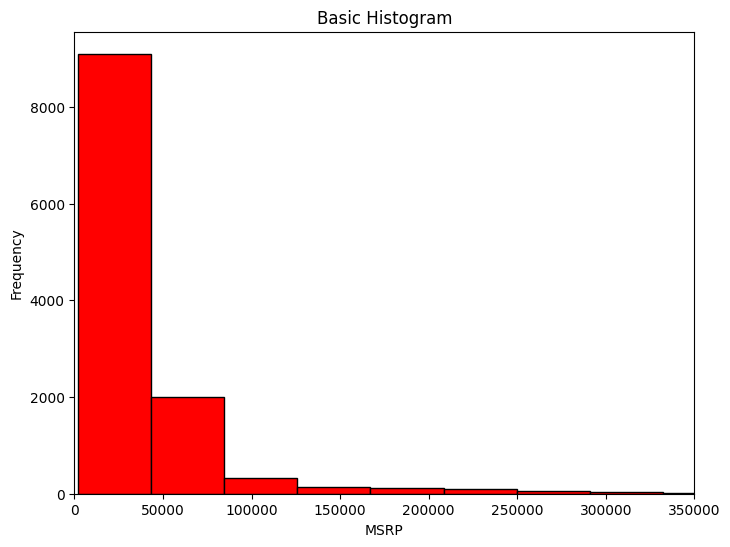

Min MSRP: 2000
Max MSRP: 2065902


In [8]:
df['MSRP'] = pd.to_numeric(df['MSRP'], errors='coerce')
target_variable = df['MSRP'].dropna()

plt.figure(figsize=(8,6))
plt.hist(target_variable, bins=50, color='red', edgecolor='black')
plt.xlim(0, 350000)

plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

print("Min MSRP:", target_variable.min())
print("Max MSRP:", target_variable.max())

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

In [9]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()
correlations_with_target = correlation['MSRP'].sort_values(ascending=False)
print("Correlations with MSRP:\n", correlations_with_target)

Correlations with MSRP:
 MSRP                1.000000
Engine HP           0.662008
Engine Cylinders    0.531312
Year                0.227590
Popularity         -0.048476
Number of Doors    -0.126635
city mpg           -0.157676
highway MPG        -0.160043
Name: MSRP, dtype: float64


### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

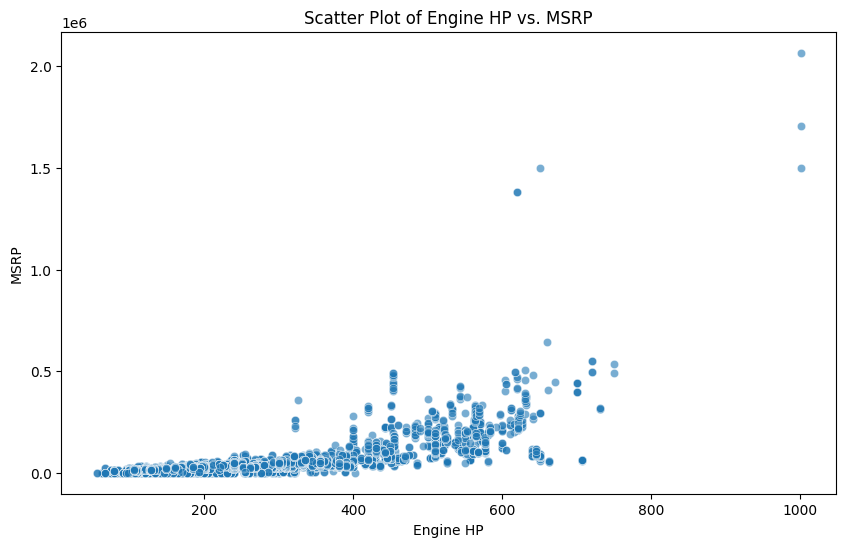

Potential Outliers in MSRP:
            Make Model  Year                Engine Fuel Type  Engine HP  \
294     Ferrari   360  2002     premium unleaded (required)      400.0   
295     Ferrari   360  2002     premium unleaded (required)      400.0   
296     Ferrari   360  2002     premium unleaded (required)      400.0   
297     Ferrari   360  2002     premium unleaded (required)      400.0   
298     Ferrari   360  2003     premium unleaded (required)      400.0   
...         ...   ...   ...                             ...        ...   
11736  Cadillac   XLR  2008                regular unleaded      320.0   
11737  Cadillac   XLR  2009  premium unleaded (recommended)      320.0   
11903       BMW    Z8  2001     premium unleaded (required)      394.0   
11904       BMW    Z8  2002     premium unleaded (required)      394.0   
11905       BMW    Z8  2003     premium unleaded (required)      394.0   

       Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
29

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine HP', y='MSRP', alpha=0.6)
plt.title('Scatter Plot of Engine HP vs. MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MSRP'] < lower_bound) | (df['MSRP'] > upper_bound)]
print("Potential Outliers in MSRP:\n", outliers)

print("I do not think outliers should be removed for this specific case.")

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [11]:
df.dropna()
print("Duplicates removed:", df.duplicated().sum())
df = df.drop_duplicates()


def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']

for column in numerical_columns:
    df = drop_outliers_iqr(df, column)

print("There were a lot of outliers, duplicates, and unfilled values in the data so I removed them.")

Duplicates removed: 715
There were a lot of outliers, duplicates, and unfilled values in the data so I removed them.


### Split into features and target

### Feature Engineering

In [12]:
target_variable = 'MSRP'
y = df[target_variable]

X = df.drop(columns=[target_variable], axis=1)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

scaler = StandardScaler()

y_reshaped = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y_reshaped)
y_scaled = y_scaled.flatten()

print("Scaled y:", y_scaled)


Features shape: (9772, 15)
Target shape: (9772,)
Scaled y: [ 1.08883651  0.73738991  0.46187114 ...  1.37620899  1.39543123
 -0.00939409]


In [13]:
# Identify numerical and categorical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('MSRP')
categorical_features = df.select_dtypes(include=['object']).columns


### Preprocessing Pipelines

In [14]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


### Create a function to build and evaluate models using pipelines

In [15]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [17]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [18]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 11546777.1307
R² Score: 0.9536
--------------------------------------------------
Model: Ridge
Mean Squared Error: 12398807.4900
R² Score: 0.9501
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16708999345.969036, tolerance: 189387663.52439645
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 11407319.6638
R² Score: 0.9541
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Model: SGDRegressor
Mean Squared Error: 14405826.4338
R² Score: 0.9421
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 41208937.8609
R² Score: 0.8343
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

In [25]:
print("Linear and ridge regression preformed well with r^2 of .9536 and .9501.\n Although these preformed well they were not the based because of the high mean squared error.\n SGD regressor showed a much worse preformance compared to the other 3 models.\n With an r^2 score of .9421 and a higher MSE. Of the models we used, the Lasso regression preformed the best.\n It had the lowest mean squared error and the highest r^2 score.\n This means that Lasso could identify the most important factors while preventing the data from being too complex.")

Linear and ridge regression preformed well with r^2 of .9536 and .9501.
 Although these preformed well they were not the based because of the high mean squared error.
 SGD regressor showed a much worse preformance compared to the other 3 models.
 With an r^2 score of .9421 and a higher MSE. Of the models we used, the Lasso regression preformed the best.
 It had the lowest mean squared error and the highest r^2 score.
 This means that Lasso could identify the most important factors while preventing the data from being too complex.


### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.